In [1]:
import pandas as pd

# 1. Read the file using encoding as Latin-1

In [2]:
file = "G:/07162025/Slice_109_Tile_1_840_1.dat"
header_lines = []
data_lines = []

with open(file, 'r', encoding='latin-1') as f:  # or encoding='cp1252'
    for line in f:
        if line.startswith('%') or line.startswith('#'):
            header_lines.append(line.strip())
        else:
            data_lines.append(line)

# 2. Ignore undecodable characters

In [6]:
with open(file, 'r', encoding='utf-8', errors='ignore') as f:
    for line in f:
        ...

# 3. Read the file as binary, decode only header

In [7]:
header_lines = []
data_bytes = b''

with open(file, 'rb') as f:
    for line in f:
        if line.startswith(b'%') or line.startswith(b'#'):
            header_lines.append(line.decode('latin-1').strip())
        else:
            data_bytes += line  # keep as raw bytes

KeyboardInterrupt: 

In [62]:
import numpy as np
filename_temp = "G:/07162025/Slice_109_Tile_1_840_"
ScanInd = 1
# Construct filename (equivalent to strcat and num2str in MATLAB)
file_name = f"{filename_temp}{int(ScanInd)}.dat"

# Open file in binary read mode
with open(file_name, 'rb') as file:
    # Read the header line (like fgetl)
    header_str = file.readline().decode('utf-8').strip()
    
    # Execute the header line (risky; eval use should be minimized)
    exec(header_str)  # WARNING: Make sure header_str is trusted before using exec

    # Read the remaining binary data as int16
    spectra_temp = np.fromfile(file, dtype=np.dtype('>i2'))
    #S1 = spectra_temp(0:2048)
# Reshape to 3D array [alineLength*2, blineLength, num_bscans]
all_bscans = np.reshape(
    spectra_temp,
    (1024*2,1000,10),
    order='F'
)

# Clear spectra_temp (optional in Python; handled by garbage collection)
#del spectra_temp


In [63]:
S1 = spectra_temp[0:2048]

In [64]:
print(header_str)

XgalvoVoltageMax=1.750000;XgalvoVoltageMin=-1.750000;YgalvoVoltageMax=1.750000;YgalvoVoltageMin=-1.750000;stimVoltage=5.000000;stimDelay=0.000000;stimDuration=1.000000;stimEveryBScan=1;clineLength=1000;blineLength=1000;interscanInterval=3.000000;alinePeriod=0.010000;interAlineInterval=0.000000;alineLength=1024;buffersPerFile=10;


In [65]:
import matplotlib.pyplot as plt

In [66]:
all_bscans.shape

(2048, 1000, 10)

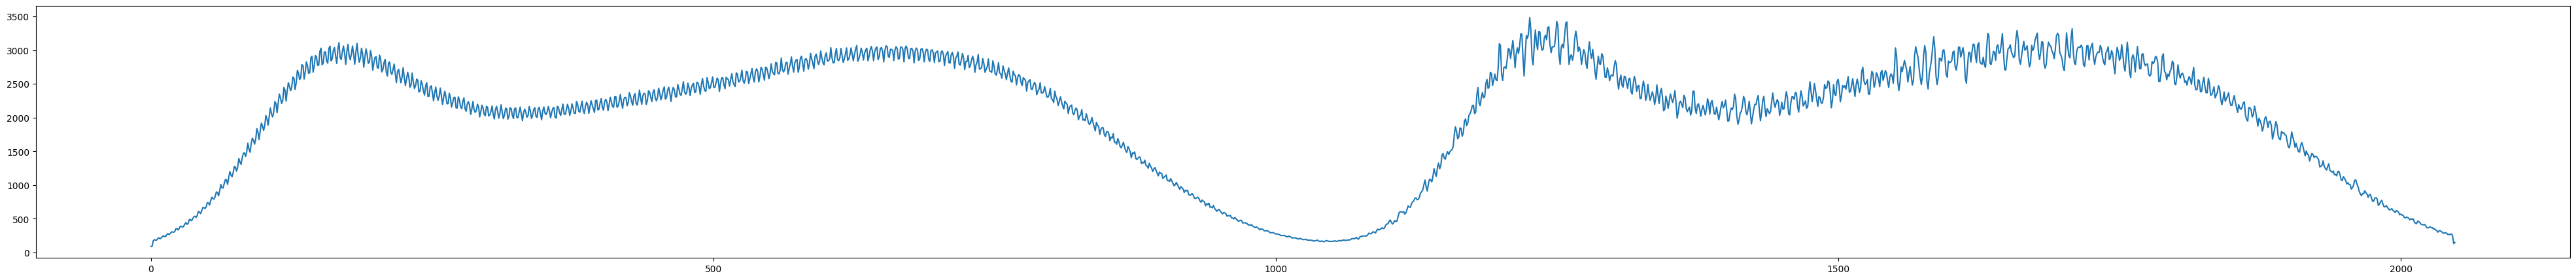

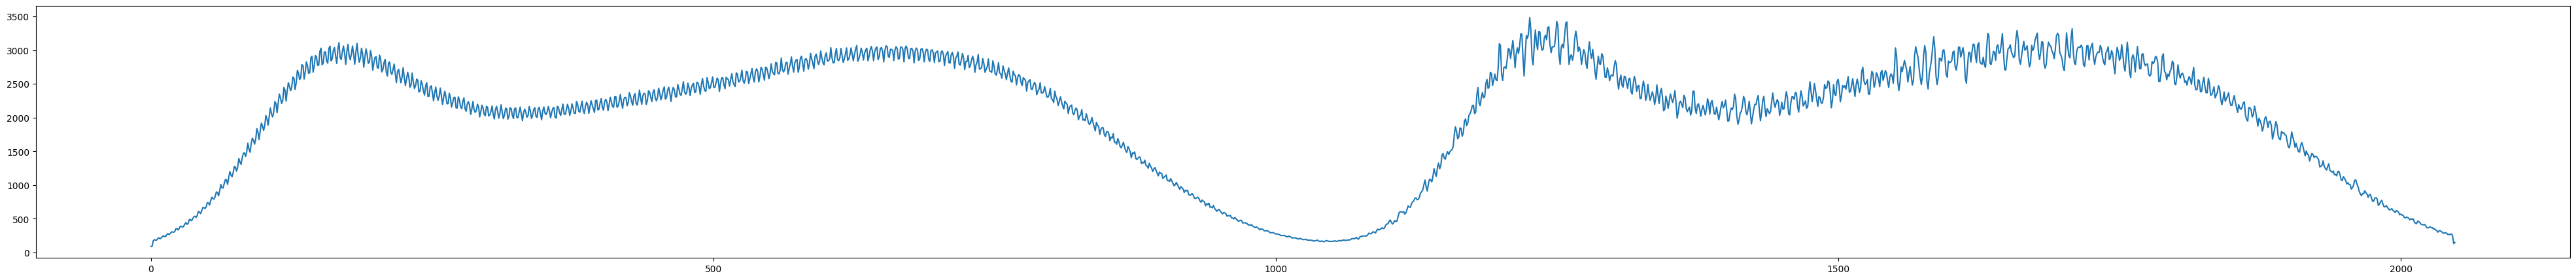

In [68]:
x = np.linspace(0,2048,2048)
y = all_bscans[:,0,0]
plt.figure(figsize=(50, 5))
plt.plot(x,y)

x = np.linspace(0,2048,2048)
y = S1
plt.figure(figsize=(50, 5))
plt.plot(x,y)

In [36]:
spectra_temp.shape

(20480000,)

In [46]:
spectra_temp[:2048].max()

np.int16(3484)

In [39]:
spectra_temp.dtype

dtype('int16')